In [1]:
import pandas as pd 
#JU_frame = pd.read_csv('/home/jupyter/sd2e-community/ginkgo/novel-chassis/201808/Novelchassis-Nand-Gate/normal_library_prep/dataframes/star/ReadCountMatrix_preCAD.tsv',sep='\t');
JU_frame = pd.read_csv('NAND_Chassis_RNAseq_preCAD_TPM.tsv',sep='\t');                        
#                       201808/Novelchassis-Nand-Gate/normal_library_prep/dataframes/bowtie2/ReadCountMatrix_preCAD.tsv',sep='\t');
#JU_frame = pd.read_csv('/home/jupyter/sd2e-community/shared-q1-workshop/usaxena/reorded_bwa_ginkgo_normal_prep/Reordered_ReadCountMatrix_preCAD_FPKM.csv')
#https://jupyter.sd2e.org/user/eyeung/tree/sd2e-community/shared-q1-workshop/usaxena/reorded_bwa_ginkgo_normal_prep
#pd.read_csv('/home/jupyter/sd2e-community/ginkgo/novel-chassis/201808/Novelchassis-Nand-Gate/normal_library_prep/dataframes/star/'
                       
                       
print(JU_frame.columns)                       
                       

Index([u'gene_id', u'sample.ginkgo.8309978', u'sample.ginkgo.8309979',
       u'sample.ginkgo.8309980', u'sample.ginkgo.8309981',
       u'sample.ginkgo.8309982', u'sample.ginkgo.8309983',
       u'sample.ginkgo.8309984', u'sample.ginkgo.8309985',
       u'sample.ginkgo.8309986',
       ...
       u'sample.ginkgo.8310320', u'sample.ginkgo.8310321',
       u'sample.ginkgo.8310322', u'sample.ginkgo.8310323',
       u'sample.ginkgo.8310324', u'sample.ginkgo.8310325',
       u'sample.ginkgo.8310326', u'sample.ginkgo.8310327',
       u'sample.ginkgo.8310328', u'sample.ginkgo.8310329'],
      dtype='object', length=353)


In [2]:
import numpy as np; 
import matplotlib.pyplot as plt; 
%matplotlib inline




In [3]:
all_column_names = JU_frame.columns;

# For parsing TACC columns 
new_column_names = [None]*len(all_column_names);
new_column_names[0] = all_column_names[0];
for col_ind in range(1,len(all_column_names)):
    column_name = str(all_column_names[col_ind]);
    #print(column_name)
    this_id = column_name.split('.')[-1];
    print(this_id)
    new_column_names[col_ind] = this_id;
clear_JU_frame = pd.DataFrame(JU_frame);
clear_JU_frame.columns=new_column_names;#JU_frame.columns;

# For parsing Uma's columns . . . 
#new_columns= clear_JU_frame.iloc[0,:]
#new_columns[0] = 'gene_id'
#clear_JU_frame.columns  = new_columns
#clear_JU_frame = clear_JU_frame.iloc[12:,:]



8309978
8309979
8309980
8309981
8309982
8309983
8309984
8309985
8309986
8309987
8309988
8309989
8309990
8309991
8309992
8309993
8309994
8309995
8309996
8309997
8309998
8309999
8310000
8310001
8310002
8310003
8310004
8310005
8310006
8310007
8310008
8310009
8310010
8310011
8310012
8310013
8310014
8310015
8310016
8310017
8310018
8310019
8310020
8310021
8310022
8310023
8310024
8310025
8310026
8310027
8310028
8310029
8310030
8310031
8310032
8310033
8310034
8310035
8310036
8310037
8310038
8310039
8310040
8310041
8310042
8310043
8310044
8310045
8310046
8310047
8310048
8310049
8310050
8310051
8310052
8310053
8310054
8310055
8310056
8310057
8310058
8310059
8310060
8310061
8310062
8310063
8310064
8310065
8310066
8310067
8310068
8310069
8310070
8310071
8310072
8310073
8310074
8310075
8310076
8310077
8310078
8310079
8310080
8310081
8310082
8310083
8310084
8310085
8310086
8310087
8310088
8310089
8310090
8310091
8310092
8310093
8310094
8310095
8310096
8310097
8310098
8310099
8310100
8310101
8310102


In [4]:
Synthetic_Genes = clear_JU_frame.gene_id[4098:]

In [5]:
'''

query={}
query['lab']='Ginkgo'
query['measurement_type']='RNA_SEQ'
query['challenge_problem']='NOVEL_CHASSIS'
query['experiment_reference'] = 'NovelChassis-NAND-Gate'
query['file_type']='ZIP';
query['experiment_id'] ='experiment.ginkgo.13893_13904';
#query['experiment_reference'] = "NovelChassis-NAND-Gate"
#query['strain_circuit'] ='NAND'
#query['strain_input_state'] = '11'
#query['file_type'] = 'FCS'

counter = 0;
sample_list = [];
cond_list = [];
cond_dict = dict();
id_to_strain_dict = dict();
strain_to_ids_dict = dict();
for match in science_table.find(query):
    #print(match['agave_system']+':'+match['agave_path'])
    #pprint.pprint(match)
    
    
    
    #relative_filename = match['filename'].split('/')[-1];
    #pprint.pprint(match)
    this_sample_id = match['sample_id'].split('.')[-1]
    #this_sample_id = relative_filename.split('_')[0];
    #if this_sample_id in clear_JU_frame.columns:
    #    print("here")
    #`col_id` = `sample[measurements][files][0][name].split('/')[:-1].split("_")[0]`
    #this_sample_id = match['sample_id'];
    #print(this_sample_id);
    #sample_list.append(this_sample_id.split('.')[2]);
    
    #match[strain_lab_id': 'name.transcriptic.MG1655_NAND_Circuit',
    
    sample_list.append(this_sample_id);
    this_temperature = match['temperature']['value'] ;
    this_timepoint = match['timepoint']['value'];
    this_replicate = match['replicate'];
    #initialize ara and iptg concentrations 
    arab_conc = 0.0;
    iptg_conc = 0.0; 
    for this_item in match['sample_contents']:

        if 'arab' in this_item['name']['label'].lower():
            try:
                arab_conc = this_item['value'];
            except:
                this_item;#pprint.pprint(this_item);
            #print(this_item['name']['label']);
            #print(this_item['unit'])
            
        if 'iptg' in this_item['name']['label'].lower():
            try:
                iptg_conc = this_item['value'];
            except:
                this_item;
                #pprint.pprint(this_item);
            #print(this_item['name']['label']);
            #print(this_item['unit']);
    cond_list.append([arab_conc,iptg_conc])
    cond_dict[this_sample_id] = [arab_conc,iptg_conc,this_temperature,this_timepoint,this_replicate];
#    cond_dict[this_sample_id.split('.')[2]] = [arab_conc,iptg_conc,this_temperature,this_timepoint];
    id_to_strain_dict[this_sample_id] = match['strain'];
#    id_to_strain_dict[this_sample_id.split('.')[2]] = match['strain'];
    if match['strain'] in strain_to_ids_dict.keys():
        strain_to_ids_dict[match['strain']].append(this_sample_id);
#        strain_to_ids_dict[match['strain']].append(this_sample_id.split('.')[2]);
    else:
        strain_to_ids_dict[match['strain']]=[this_sample_id];
#        strain_to_ids_dict[match['strain']]=[this_sample_id.split('.')[2]];
    
    #pprint.pprint(match['sample_contents']['label'])
    counter = counter+1;


print(counter);
print(strain_to_ids_dict.keys());
'''

'\n\nquery={}\nquery[\'lab\']=\'Ginkgo\'\nquery[\'measurement_type\']=\'RNA_SEQ\'\nquery[\'challenge_problem\']=\'NOVEL_CHASSIS\'\nquery[\'experiment_reference\'] = \'NovelChassis-NAND-Gate\'\nquery[\'file_type\']=\'ZIP\';\nquery[\'experiment_id\'] =\'experiment.ginkgo.13893_13904\';\n#query[\'experiment_reference\'] = "NovelChassis-NAND-Gate"\n#query[\'strain_circuit\'] =\'NAND\'\n#query[\'strain_input_state\'] = \'11\'\n#query[\'file_type\'] = \'FCS\'\n\ncounter = 0;\nsample_list = [];\ncond_list = [];\ncond_dict = dict();\nid_to_strain_dict = dict();\nstrain_to_ids_dict = dict();\nfor match in science_table.find(query):\n    #print(match[\'agave_system\']+\':\'+match[\'agave_path\'])\n    #pprint.pprint(match)\n    \n    \n    \n    #relative_filename = match[\'filename\'].split(\'/\')[-1];\n    #pprint.pprint(match)\n    this_sample_id = match[\'sample_id\'].split(\'.\')[-1]\n    #this_sample_id = relative_filename.split(\'_\')[0];\n    #if this_sample_id in clear_JU_frame.columns:

In [6]:
import pickle
dict_file = open('dict_files.pickle','rb')
dict_list = pickle.load(dict_file);
strain_to_ids_dict = dict_list[0];
cond_dict = dict_list[1];

In [7]:
strain_to_ids_dict.keys()

[u'MG1655_pBADmin',
 u'MG1655_pJS007_LALT__P3__PhlF',
 u'MG1655_WT',
 u'MG1655_pJS007_LALT__backbone',
 u'MG1655_NAND_Circuit',
 u'MG1655_PhlF_Gate',
 u'MG1655_IcaR_Gate',
 u'MG1655_pTACmin',
 u'MG1655_pJS007_LALT__I1__IcaRA']

In [8]:
#clear_JU_frame.to_csv('Floated_Reordered_ReadCountMatrix_preCAD_Normal_TPM.csv')
clear_JU_frame = pd.DataFrame.from_csv('Floated_Reordered_ReadCountMatrix_preCAD_Normal_TPM.csv')

In [9]:
clear_JU_frame

,gene_id,8309978,8309979,8309980,8309981,8309982,8309983,8309984,8309985,8309986,...,8310320,8310321,8310322,8310323,8310324,8310325,8310326,8310327,8310328,8310329
0,thrL,176.751748,399.034803,469.635274,349.437299,698.946157,1020.240070,907.510413,706.396473,305.207999,...,953.887693,585.816724,2220.063403,2009.424555,1905.005859,674.626530,2903.116014,2158.905712,2916.211764,2371.992828
1,thrA,21.452852,17.227244,24.605757,17.895124,27.242725,31.671357,28.857578,24.366732,22.228835,...,225.243745,241.219067,230.868972,295.085427,245.188555,124.640917,371.924651,347.107861,316.638570,367.401521
2,thrB,65.458658,64.296069,84.294089,76.903671,68.706696,59.551201,59.917086,59.485707,65.324426,...,184.675499,205.560852,176.050683,223.298856,179.827015,104.236592,269.454235,330.893373,242.594768,260.343596
3,thrC,41.588647,45.474052,53.200169,48.184516,30.722908,32.306887,41.264576,37.999286,45.751100,...,210.136046,222.190958,191.919527,253.426899,217.675869,143.847492,277.895458,252.179869,262.077855,285.691904
4,yaaX,11.552402,14.779067,10.903638,3.451233,44.377534,40.883937,44.367176,43.215647,15.651692,...,46.220122,55.423804,39.503436,48.543814,43.588822,39.451844,46.485034,53.306314,55.274602,54.956486
5,yaaA,15.896819,16.319742,8.335600,18.468758,16.962841,22.257279,23.639653,18.216298,14.624361,...,62.951917,50.253172,50.067655,52.471110,51.850166,54.288174,56.186596,20.375772,57.434514,64.148983
6,yaaJ,16.304144,14.314316,14.547981,13.609578,33.492478,31.884328,28.461962,32.296517,14.798560,...,10.805745,11.503054,7.767309,6.805718,10.059971,13.100990,10.038966,11.063575,11.274293,10.915480
7,talB,253.193773,238.742346,322.480243,240.137414,995.982574,987.385654,1047.651329,906.624566,270.705369,...,1170.824558,1135.993436,1025.284810,1050.482549,1047.394972,1191.371247,983.492708,896.149541,1065.025063,1016.243423
8,mog,66.520616,49.766245,60.581949,70.600597,80.490884,86.982662,88.281625,73.595058,52.704678,...,61.450644,69.661172,58.509577,62.841571,55.306208,81.701548,50.449595,26.925128,55.678173,57.606625
9,satP,106.502143,136.765015,141.969820,126.545195,137.359033,137.577694,142.256659,123.473277,134.819868,...,35.063541,28.356365,34.850149,28.964016,32.695768,61.995755,26.817138,13.961177,31.948538,28.477196


In [10]:

all_strains = strain_to_ids_dict.keys();
master_dict = dict();
for this_strain_id in all_strains:
    wt_ids = list(set(strain_to_ids_dict[this_strain_id]));
    
    data_by_cond_dict = dict();
    for wt_id in wt_ids:
        cond_num = cond_dict[wt_id];
        if cond_num[0]>0.0:
            ara_state = '1';
        else:
            ara_state = '0';
        if cond_num[1]>0.0:
            iptg_state = '1';
        else:
            iptg_state = '0';
        
        temperature=repr(int(cond_num[2]));
        timepoint = repr(int(cond_num[3]));
        replicate_num = repr(int(cond_num[4]));
        
        cond_key = ara_state+iptg_state+temperature+timepoint+ replicate_num;
        #print(wt_id)
        if wt_id in clear_JU_frame.columns:
            data_for_condition = clear_JU_frame[wt_id].as_matrix();
            #data_for_condition[data_for_condition<40] = 0.0;
            #print(data_for_condition.shape)
            for ind in range(0,data_for_condition.shape[0]):
                data_for_condition = data_for_condition;    

            if this_strain_id in master_dict.keys():
                if cond_key in master_dict[this_strain_id].keys():
                    master_dict[this_strain_id][cond_key].append(data_for_condition);    
                else:    
                    master_dict[this_strain_id][cond_key] = [data_for_condition];

            else:
                master_dict[this_strain_id] = dict(); 
                if cond_key in master_dict[this_strain_id].keys():
                    master_dict[this_strain_id][cond_key].append(data_for_condition);    
                else:    
                    master_dict[this_strain_id][cond_key] = [data_for_condition];
                


In [82]:
timepair_list = [];
for ind_cond in ['00']:
    for temp in ['37']:
        for replicate_ind in ['0','1','2','3']:
            pair_string = [ind_cond+temp+'5'+replicate_ind,ind_cond+temp+'18'+replicate_ind];
            timepair_list.append(pair_string);



In [83]:
#max_FKPM = 3e4;
all_genes = clear_JU_frame['gene_id'];
this_strain_id = 'MG1655_WT'
#this_strain_id = 'MG1655_NAND_Circuit'
#this_strain_id = 'MG1655_pJS007_LALT__P3__PhlF'
#this_strain_id = 'MG1655_IcaR_Gate'
timepoint_5hr_index = 0; 
timepoint_18hr_index = 1; 
T1_list = [];
T2_list = [];
for pair_tuple in timepair_list:
    x_vec = master_dict[this_strain_id][pair_tuple[timepoint_5hr_index]][0]
    y_vec = master_dict[this_strain_id][pair_tuple[timepoint_18hr_index]][0];
    
    T1_list.append(x_vec);
    T2_list.append(y_vec);

    
T1_list= np.asarray(T1_list)
T2_list= np.asarray(T2_list)

In [84]:
T1_list[0:10]

array([[ 2153.43492204,   472.94149308,   377.28506127, ...,
            0.        ,     0.        ,     0.        ],
       [ 2461.21043064,   479.64221147,   338.24600018, ...,
            0.        ,     0.        ,     0.        ],
       [ 1368.92947001,   326.03750407,   252.57231595, ...,
            0.        ,     0.        ,     0.        ],
       [ 3979.59537485,   301.09391683,   210.79477623, ...,
            0.        ,     0.        ,     0.        ]])

In [85]:

T2_list.shape

(4, 4136)

In [86]:

T1_list = np.asarray(T1_list,dtype=np.float32)
T2_list = np.asarray(T2_list,dtype=np.float32)

In [262]:


T1_list_raw = T1_list; 
T2_list_raw = T2_list;


%autoreload
viz_this_set = True; 
timepair_list = [];
for ind_cond in ['01']:
    for temp in ['37']:
        for replicate_ind in ['0','1','2','3']:
            pair_string = [ind_cond+temp+'5'+replicate_ind,ind_cond+temp+'18'+replicate_ind];
            timepair_list.append(pair_string);
            
#this_strain_id = 'MG1655_WT'
#this_strain_id = 'MG1655_NAND_Circuit'
this_strain_id = 'MG1655_pJS007_LALT__P3__PhlF'
#this_strain_id = 'MG1655_IcaR_Gate'
timepoint_5hr_index = 0; 
timepoint_18hr_index = 1; 
T1_list = [];
T2_list = [];
for pair_tuple in timepair_list:
    x_vec = master_dict[this_strain_id][pair_tuple[timepoint_5hr_index]][0]
    y_vec = master_dict[this_strain_id][pair_tuple[timepoint_18hr_index]][0];
    
    T1_list.append(x_vec);
    T2_list.append(y_vec);
    

T1_list = np.asarray(T1_list,dtype=np.float32)
T2_list = np.asarray(T2_list,dtype=np.float32)

T1_list_raw = T1_list; 
T2_list_raw = T2_list;

#T1_list_log = np.log10(T1_list);
#T1_list_log[T1_list_log==-np.Inf] = 0.0;
#T2_list_log = np.log10(T2_list);
#T2_list_log[T2_list_log==-np.Inf] = 0.0;


T1_list = np.asarray(T1_list,dtype=np.float32)
T2_list = np.asarray(T2_list,dtype=np.float32)

T1_list_raw = T1_list; 
T2_list_raw = T2_list;


import sklearn;
from sklearn.preprocessing import Normalizer
transformer1 = Normalizer().fit(T1_list_raw)
T1_list = transformer1.transform(T1_list_raw)

transformer2 = Normalizer().fit(T2_list_raw)
T2_list =  transformer2.transform(T2_list_raw)



#T1_list_log = np.log10(T1_list);
#T1_list_log[T1_list_log==-np.Inf] = 0.0;
#T2_list_log = np.log10(T2_list);
#T2_list_log[T2_list_log==-np.Inf] = 0.0;

#T1_list = T1_list_log;
#T2_list = T2_list_log;

ERROR: Line magic function `%autoreload` not found.


In [270]:
#for sub_rep in [[0,1,2,3]]:
for sub_rep in [[0,1,2],[0,1,3],[1,2,3],[0,2,3],[0,1,2,3] ]:
    plt.figure(figsize=(10,10))


    mu_t1 = np.mean(T1_list[sub_rep][:],axis=0);
    s_t1 = np.std(T1_list[sub_rep][:],axis=0);

    mu_t2 = np.mean(T2_list[sub_rep][:],axis=0);
    s_t2 = np.std(T2_list[sub_rep][:],axis=0);
    cv1 = mu_t1-mu_t1;
    cv2 = mu_t2-mu_t2;
    low_cv_indices = [];
    for k in range(0,len(mu_t1)):
        good_cv = True;
        if mu_t1[k]>0.0:
            cv1[k] = s_t1[k]/mu_t1[k];
            if cv1[k]>0.1:
                good_cv = False;
        else:
            good_cv = False;
        if mu_t2[k]>0.0:
            cv2[k] = s_t2[k]/mu_t2[k];
            if cv2[k]>0.1:
                good_cv = False;
        else:
            good_cv=False;
            
        if mu_t1[k]>0.0 and mu_t2[k]>0.0:
            if np.abs(mu_t1[k]/ mu_t2[k] -1.0) <0.3:
                good_cv = False;
        
        if good_cv:
            low_cv_indices.append(k);
    #print(all_genes[low_cv_indices]);

    #plt.scatter((mu_t1),cv1,alpha=0.1);
    #plt.scatter((mu_t2),cv2,alpha=0.1);

    
#    plt.scatter(np.arange(0,T1_list.shape[1],1),cv1,alpha=0.1);
#    plt.scatter(np.arange(0,T2_list.shape[1],1),cv2,alpha=0.1);
    #ax = plt.gca();
    #ax.spines['right'].set_visible(False)
    #ax.spines['top'].set_visible(False)
    #sub_rep_str = [str(elem) for elem in sub_rep]
    #plt.legend(['Samples '+','.join(sub_rep_str)+' @ 5 hr','Samples ' + ','.join(sub_rep_str)+' @ 18 hr'] )
    #plt.ylim([-.05,0.6])
    #plt.ylabel('Coefficient of Variation (s/µ)')
    #plt.xlabel('Mean of FPKM (log)')
#plt.errorbar(np.arange(0,T2_list.shape[1],1),np.std(T2_list,axis=0)/np.mean(T2_list,axis=0) );
#plt.errorbar(np.arange(0,T2_list.shape[1],1), np.mean(T2_list,axis=0), yerr=np.std(T2_list,axis=0));
#plt.ylim([0,1e4]);

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [271]:
print("# of genes with low FPKM CV: " + repr(len(low_cv_indices)))
#print("# of genes with low FPKM CV: " + repr(len(all_genes)));

# of genes with low FPKM CV: 106


In [272]:
T2_list[:,low_cv_indices[0:10]]

array([[ 0.00063771,  0.00065034,  0.00040884,  0.00057455,  0.01415444,
         0.00119981,  0.00028473,  0.00409805,  0.00076347,  0.0003415 ],
       [ 0.00070601,  0.00071337,  0.00050263,  0.00051263,  0.01713433,
         0.00153969,  0.00031867,  0.00464061,  0.00080612,  0.00032582],
       [ 0.00062373,  0.00072659,  0.00040378,  0.00050064,  0.01576489,
         0.00135316,  0.00031334,  0.00455412,  0.00078001,  0.00039022],
       [ 0.00053433,  0.00059669,  0.00040133,  0.00044841,  0.01409577,
         0.0012583 ,  0.00024801,  0.00362746,  0.00065466,  0.00030257]], dtype=float32)

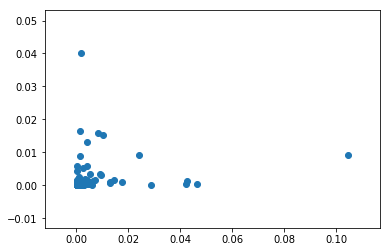

In [273]:
plt.scatter((mu_t1[low_cv_indices]),(mu_t2[low_cv_indices]))


In [274]:
thirtyseven_low_cv_indices = low_cv_indices;

In [591]:
lac_indices = [];
for ind in range(0,len(all_genes)):
    if 'lac' in str(all_genes[ind]):#.lower():
        lac_indices.append(ind)

ara_indices = [];
for ind in range(0,len(all_genes)):
    if 'ara' in str(all_genes[ind]):#.lower():
        ara_indices.append(ind)     

In [597]:
for ind in ara_indices:
    print(all_genes[ind])

araD
araA
araB
araC
araJ
araH
araG
araF
araE


In [598]:
#common_indices = list(set(thirtyseven_low_cv_indices).intersection( set(thirty_low_cv_indices) ));
common_indices = thirtyseven_low_cv_indices
common_indices = ara_indices+lac_indices;


In [599]:
circuit_ids = list(np.arange(4098,len(all_genes),1))#list(np.arange(0,13,1))
circuit_names = list(all_genes)[circuit_ids[0]:(circuit_ids[-1]+1)]
#print(circuit_names)

In [600]:
len(circuit_ids)

38

In [601]:
#common_indices = circuit_gene_in_indices

In [602]:
for gene in all_genes:
    if 'yfp' in gene or 'YFP' in gene:
        print(gene)

Actuator_YFP


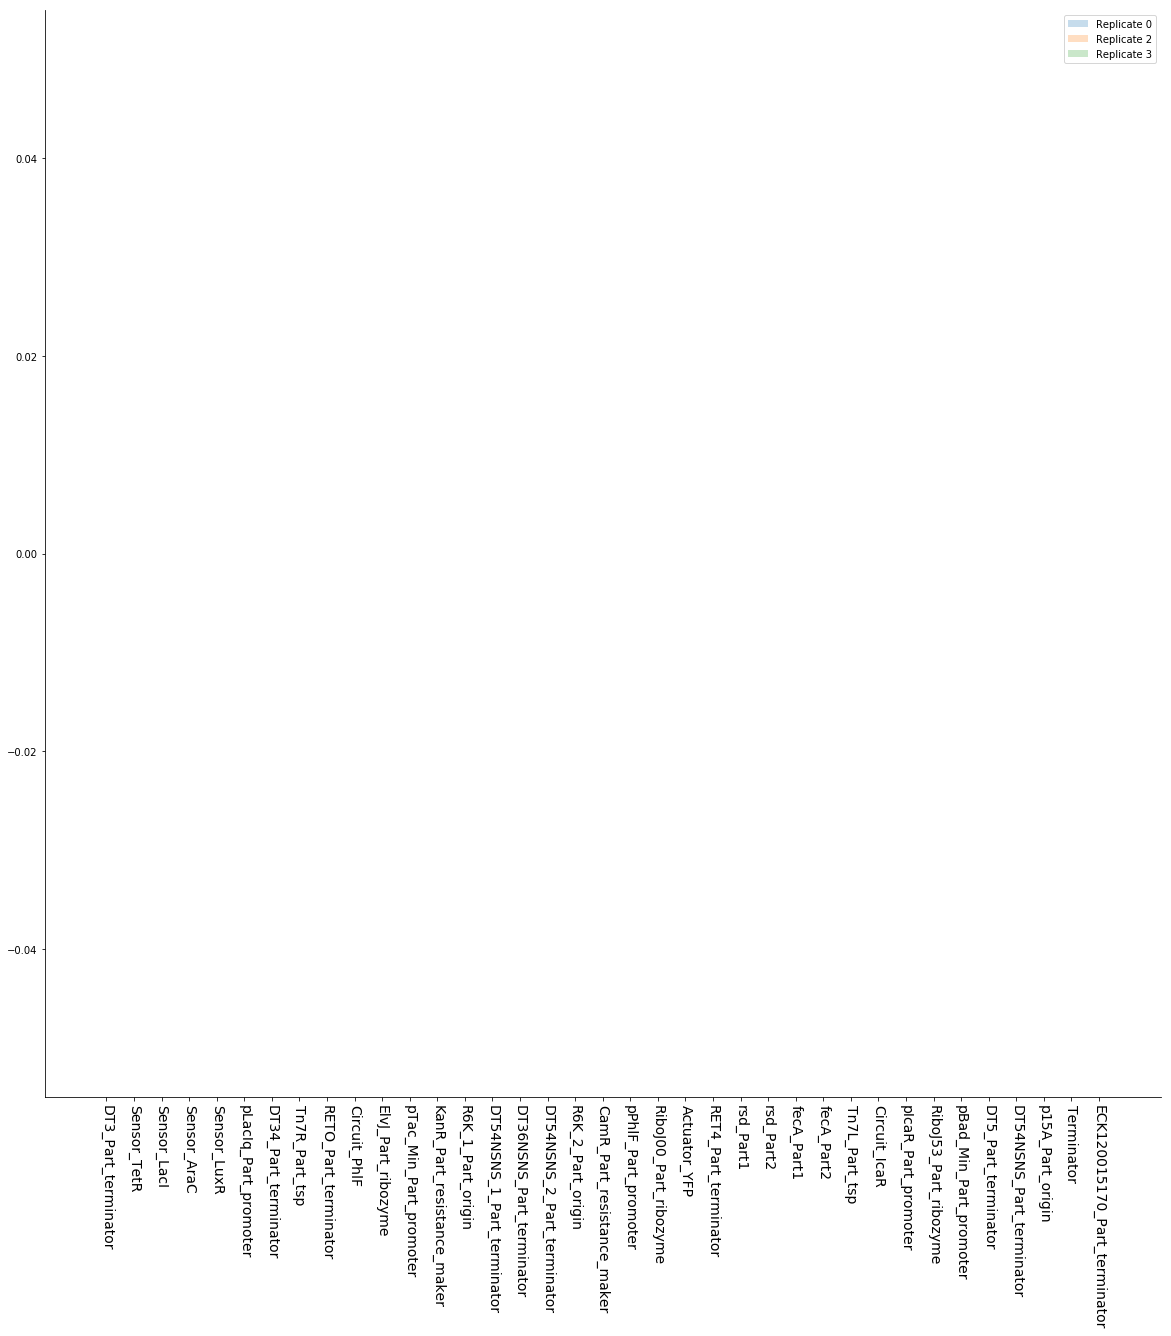

In [603]:
plt.figure(figsize=(20,20))
for col_ind in [0,2,3]:
    plt.bar(np.arange(1,len(circuit_ids),1),T1_list.T[circuit_ids[0]:circuit_ids[-1],col_ind],alpha=0.25)
    
ax = plt.gca()
ax.set_xticks(np.arange(1,len(circuit_ids),1))
ax.set_xticklabels(circuit_names,rotation=-90,fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(['Replicate 0','Replicate 2','Replicate 3'])

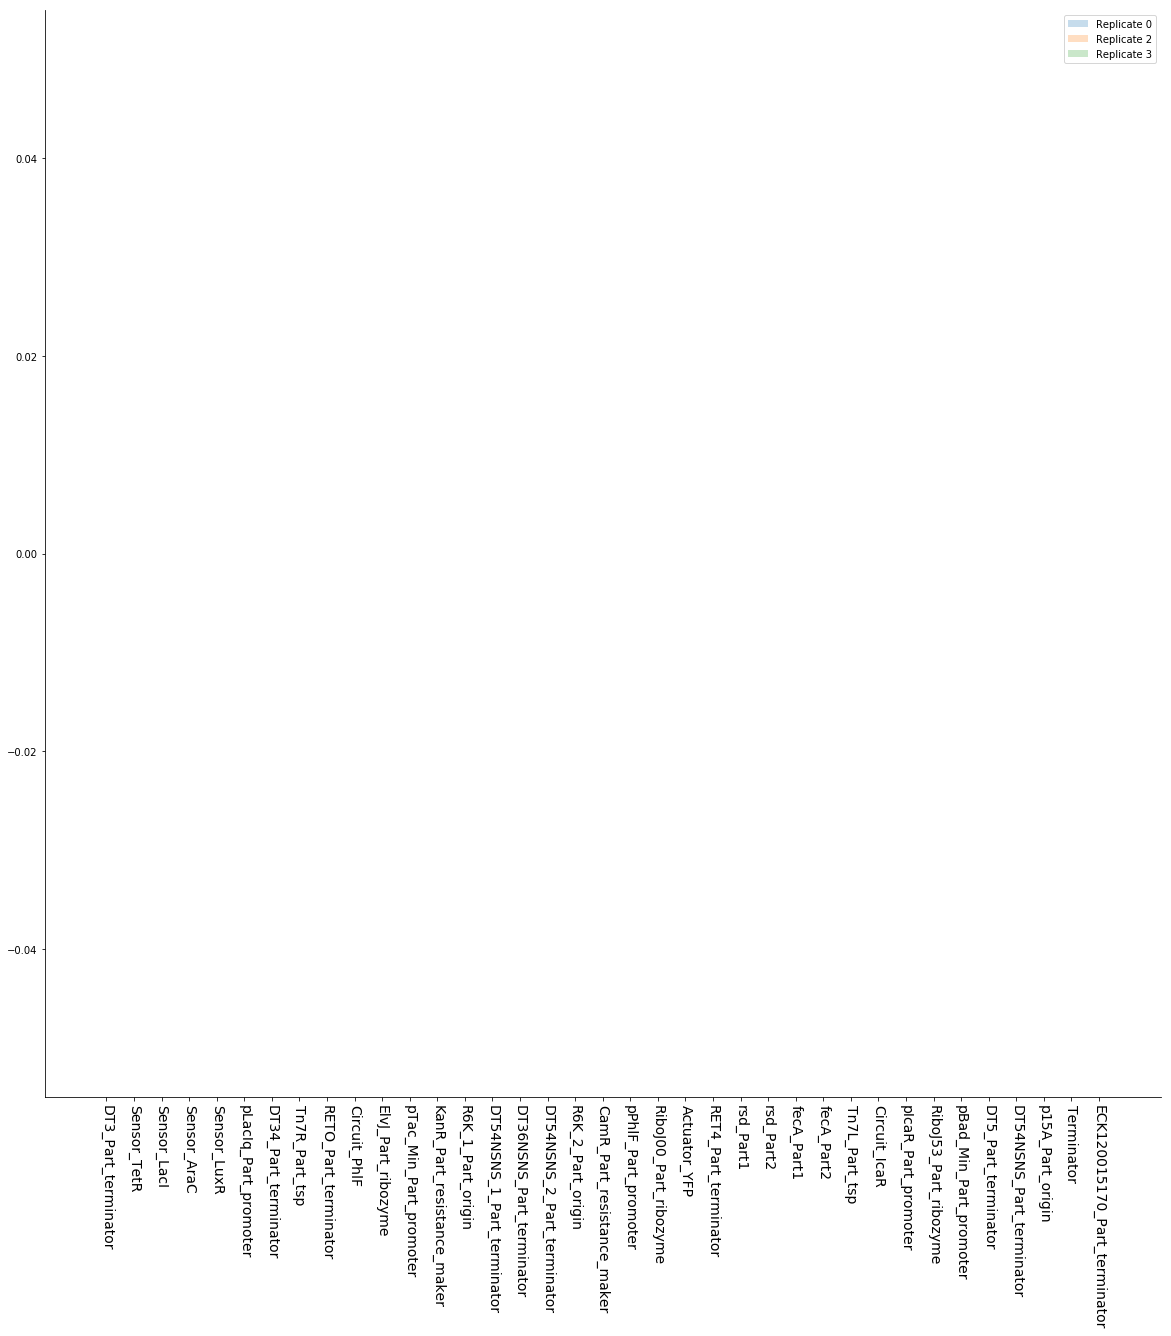

In [604]:
plt.figure(figsize=(20,20))
for col_ind in [0,2,3]:
    plt.bar(np.arange(1,len(circuit_ids),1),T2_list.T[circuit_ids[0]:circuit_ids[-1],col_ind],alpha=0.25)
    
ax = plt.gca()
ax.set_xticks(np.arange(1,len(circuit_ids),1))
ax.set_xticklabels(circuit_names,rotation=-90,fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(['Replicate 0','Replicate 2','Replicate 3'])

In [605]:
low_cv_reps = [0,2,3]
col_ind_map = [0,0,1,2]
Yp_data = np.zeros((len(common_indices),len(low_cv_reps)))
Yf_data = np.zeros((len(common_indices),len(low_cv_reps)))
for col_ind in low_cv_reps:
    Yp_data[:,col_ind_map[col_ind]] = T1_list.T[common_indices,col_ind];
    Yf_data[:,col_ind_map[col_ind]]= T2_list.T[common_indices,col_ind];




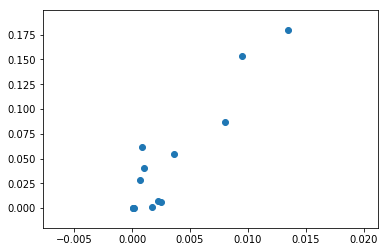

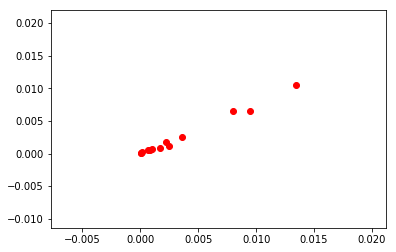

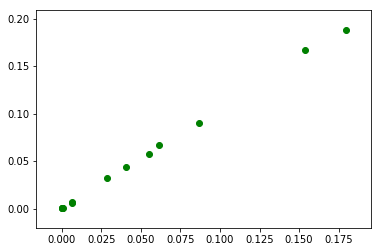

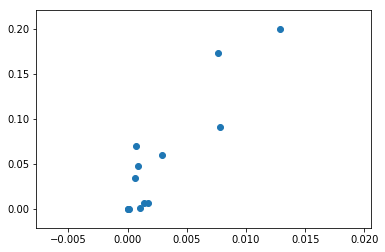

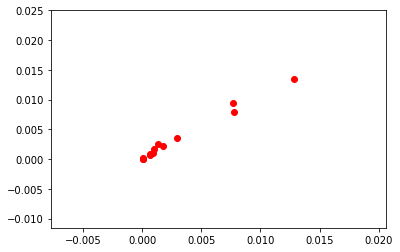

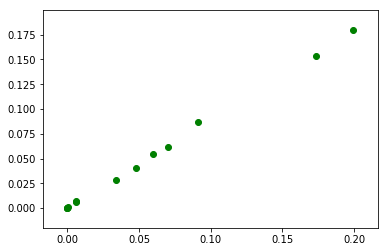

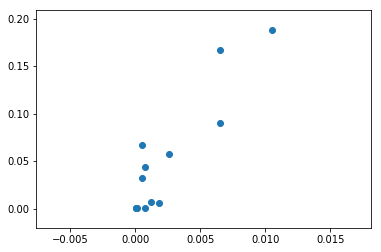

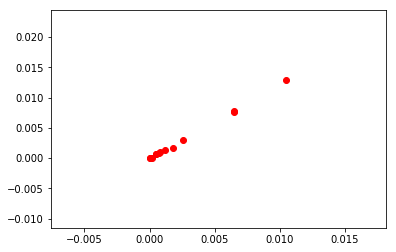

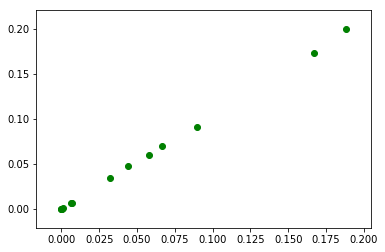

In [606]:
for ind in range(0,Yp_data.shape[1]):
    plt.figure()
    plt.scatter(Yp_data[:,ind],Yf_data[:,ind])
    plt.figure()
    plt.scatter(Yp_data[:,ind],Yp_data[:,ind-1],color='r')
    plt.figure()
    plt.scatter(Yf_data[:,ind],Yf_data[:,ind-1],color='g')

In [607]:
!pip install --user cvxopt

from cvxopt import matrix, solvers
!pip install --user cvxpy


You are using pip version 18.0, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.0, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [608]:
from cvxpy import Minimize
from cvxpy import Minimize, Problem, Variable,norm1,installed_solvers,lambda_max;
from cvxpy import norm as cvxpynorm;
import cvxpy

In [609]:
%autoreload
class Lifting:
    import numpy as np
    
    def __init__(self,this_index_of_used_functions,this_function_dictionary,this_num_input_vars):
        self.function_dictionary = list(this_function_dictionary);
        self.indices_of_used_functions = list(this_index_of_used_functions);
        self.num_input_vars = np.int(this_num_input_vars);
        
            
    def eval_lifting_list(self,input_var):
        import numpy as np;
        evaluated_lifting = -1.0;
        #if not (len(input_var)== self.num_input_vars):
        #    print("Error: input var supplied does not match target input var size:" + repr (self.num_input_vars));
        #    import numpy as np;
        #    return evaluated_lifting;
        #else:
        evaluated_lifting = [];
        for dict_index in self.indices_of_used_functions:
            this_dictionary_function = self.function_dictionary[dict_index];
            evaluated_lifting.append(this_dictionary_function(input_var))

        return evaluated_lifting;
    
    
    def eval_lifting_array(self,input_var):
        import numpy as np;
        evaluated_lifting = -1.0
        #if not (len(input_var)== self.num_input_vars):
        #    print("Error: input var supplied does not match target input var size:" + repr (self.num_input_vars));
        #    import numpy as np;
        #    return evaluated_lifting;

        evaluated_lifting = [];
        for dict_index in self.indices_of_used_functions:
            
            this_dictionary_function = self.function_dictionary[dict_index];
            evaluated_lifting.append(this_dictionary_function(input_var))
        
        return np.asarray(evaluated_lifting).reshape((len(evaluated_lifting),1));

    def append_lifting_terms(self,new_index_of_used_functions,new_function_dictionary,new_num_input_vars):
        
        try:
            if len(new_index_of_used_functions) > len(new_function_dictionary):
                raise Exception('number of indices of used functions should not exceed length of new function dictionary');
            self.indices_of_used_functions = self.indices_of_used_functions + list(new_index_of_used_functions + len(self.function_dictionary)); 
            self.num_input_vars = self.num_input_vars + new_num_input_vars;
            self.function_dictionary = self.function_dictionary + list(new_function_dictionary);
            return self;
        except (Exception):
            return -1.0;
        
    def lifting_dim(self):
        return len(self.indices_of_used_functions);
    
    def return_dim(self):
        return len(self.indices_of_used_functions);
    
    def print_Koopman_string_meme(self):
        print('Bro, are you even ' + repr(self)[10:] )
        
        
    #to do for AH and NB, what other abstract properties should a lifting class have? 
%autoreload    

ERROR: Line magic function `%autoreload` not found.
ERROR: Line magic function `%autoreload` not found.


In [639]:
class InputKoopmanModel:
    def __init__(self,this_K_open_loop,this_state_lifting,this_K_input,this_input_lifting):
        self.K_open_loop = np.asarray(this_K_open_loop,dtype=np.float32)
        self.K_input =  np.asarray(this_K_input,dtype=np.float32)
        self.Psi_open_loop = this_state_lifting
        self.Psi_input = this_input_lifting
        
        self.Kol = self.K_open_loop
        self.Ki = self.K_input
        self.Pol = self.Psi_open_loop
        self.Pi = self.Psi_input
        
    def append_input(self,new_K_input,new_input_lifting):
        try:
            self.K_input = np.hstack((self.K_input,np.asarray(new_K_input,dtype=np.float32)));
        except:
            print(self.K_input.shape)
            print(new_K_input.shape)
        niuf= new_input_lifting.indices_of_used_functions;
        niv = new_input_lifting.num_input_vars; 
        nfd = new_input_lifting.function_dictionary;    
        self.Psi_input.append_lifting_terms(niuf,nfd,niv);
        
    def eval_diff(self,state_vec,input_vec):
        return np.dot(self.Kol,self.Pol.eval_lifting_array(state_vec))+ np.dot(self.Ki,self.Pi.eval_lifting_array(input_vec));
        
    def print_Koopman_string_meme(self):
        print('Bro, do you even lift?');
        
    
def calc_Input_Koopman(Kol,Yf,Yp,Up,flag=1,lambda_val=0.0):
    solver_instance = cvxpy.SCS;
    Ki = None;
    if flag==1: # moore penrose inverse, plain ol' least squares input-Koopman
        #Yp_inv = np.dot(np.transpose(Yp_final), np.linalg.inv( np.dot(Yp_final,np.transpose(Yp_final)) )   );
        Yfprime = Yf-np.dot(Kol,Yp)
        Up_inv = np.linalg.pinv(Up);
        Ki = np.dot(Yfprime,Up_inv);
        

    if flag ==2: # cvx optimization approach - L2 + L1 lasso 
        norm1_term = 0.0;
        all_col_handles = [None]*Up.shape[0]
        for i in range(0,Up.shape[0]):
            print(Yf.shape[0])
            all_col_handles[i] = Variable(rows=Yf.shape[0],cols=1) ;#Variable(shape=(Yf.shape[0],1) );
        #    if norm1_term < cvxpy.norm(all_col_handles[i],p=1):
        #        norm1_term = cvxpy.norm(all_col_handles[i],p=1);
            #norm1_term =  cvxpy.max(cvxpy.hstack( [norm1_term,cvxpy.norm(all_col_handles[i],p=1) ])  );
        operator = cvxpy.hstack(all_col_handles);
        norm1_term =cvxpy.norm( operator,p=1);
        #operator = all_col_handles[0];
        #for i in range(1,Yf.shape[0]):
        #    operator = cvxpy.hstack([operator,all_col_handles[i]]);
        #operator.
        #print("[INFO]: CVXPY Koopman operator variable: " +repr(operator.shape));
        #print(repr(operator));
        #print("[INFO]: Yf.shape in calc_Koopman: " + repr(Yf.shape));
        #print("[INFO]: Yp.shape in calc_Koopman: " + repr(Yp.shape));
        Yfprime = Yf-np.dot(Kol,Yp)
        norm2_fit_term = cvxpy.norm(cvxpy.norm(Yfprime-operator*Up,p=2,axis=0),p=2);
        objective = Minimize(norm2_fit_term + lambda_val*norm1_term)
        constraints = [];
        prob = Problem(objective,constraints);
        result = prob.solve(verbose=True,solver=solver_instance,max_iters=np.int(1e7))#,reltol=1e-10,abstol=1e-10);
        print("[INFO]: Finished executing cvx solver, printing CVXPY problem status")
        print(prob.status);
        Ki = operator.value;
    return Ki;
        
def calc_Append_Input_Koopman(Kol,Ki,Yf,Yp,Up,Uamend,flag=1,lambda_val=0.0):
    solver_instance = cvxpy.SCS;
    Kamend = None;
    if flag==1: # moore penrose inverse, plain ol' least squares input-Koopman
        #Yp_inv = np.dot(np.transpose(Yp_final), np.linalg.inv( np.dot(Yp_final,np.transpose(Yp_final)) )   );
        Yfprime = Yf-np.dot(Kol,Yp)-np.dot(Ki,Up);
        Ua_inv = np.linalg.pinv(Uamend);
        Kamend = np.dot(Yfprime,Ua_inv);
        

    if flag ==2: # cvx optimization approach - L2 + L1 lasso 
        norm1_term = 0.0;
        all_col_handles = [None]*Uamend.shape[0]
        for i in range(0,Uamend.shape[0]):            
            all_col_handles[i] = Variable(rows=Yf.shape[0],cols=1) ;#Variable(shape=(Yf.shape[0],1) );
        #    if norm1_term < cvxpy.norm(all_col_handles[i],p=1):
        #        norm1_term = cvxpy.norm(all_col_handles[i],p=1);
            #norm1_term =  cvxpy.max(cvxpy.hstack( [norm1_term,cvxpy.norm(all_col_handles[i],p=1) ])  );
        operator = cvxpy.hstack(all_col_handles);
        norm1_term =cvxpy.norm(operator,p=1);
        #operator = all_col_handles[0];
        #for i in range(1,Yf.shape[0]):
        #    operator = cvxpy.hstack([operator,all_col_handles[i]]);
        #operator.
        #print("[INFO]: CVXPY Koopman operator variable: " +repr(operator.shape));
        #print(repr(operator));
        #print("[INFO]: Yf.shape in calc_Koopman: " + repr(Yf.shape));
        #print("[INFO]: Yp.shape in calc_Koopman: " + repr(Yp.shape));
        Yfprime = Yf- np.dot(Kol,Yp)-np.dot(Ki,Up)
        norm2_fit_term = cvxpy.norm(cvxpy.norm(Yfprime-operator*Uamend,p=2,axis=0),p=2);
        objective = Minimize(norm2_fit_term + lambda_val*norm1_term)
        constraints = [];
        prob = Problem(objective,constraints);
        result = prob.solve(verbose=True,solver=solver_instance,max_iters=np.int(1e7))#,reltol=1e-10,abstol=1e-10);
        print("[INFO]: Finished executing cvx solver, printing CVXPY problem status")
        print(prob.status);
        Kamend = operator.value;
    return Kamend;        

def train_Append_Input_Koopman(Xf,Xp,unl_Up,unl_UAmend,this_InputKoopmanModel,AmendLifting,num_rawstates,num_rawinputs,num_rawamendinputs,num_snapshots):
    if Xf.shape[1] == num_rawstates:
        Xf = Xf.T;
    if Xp.shape[1] ==num_rawstates:
        Xp = Xp.T; 
    if unl_Up.shape[1] == num_rawinputs:
        unl_Up = unl_Up.T; 
    if unl_UAmend.shape[1] == num_rawamendinputs:
        unl_UAmend = unl_UAmend.T;
        
    PsiXf = np.zeros(this_InputKoopmanModel.Pol.return_dim(),Xf.shape[1]);
    for ind in range(0,Xf.shape[1]):
        PsiXf[:,ind] = this_InputKoopmanModel.Pol.eval_lifting_array(Xf[:,ind]);
    
    PsiXp = np.zeros(this_InputKoopmanModel.Pol.return_dim(),Xp.shape[1]);
    for ind in range(0,Xp.shape[1]):
        PsiXp[:,ind] = this_InputKoopmanModel.Pol.eval_lifting_array(Xp[:,ind]);
    
    PsiUp = np.zeros(this_InputKoopmanModel.Pi.return_dim(),unl_Up.shape[1]);
    for ind in range(0,unl_Up.shape[1]):
        PsiUp[:,ind] = this_InputKoopmanModel.Pi.eval_lifting_array(unl_Up[:,ind]);
    
    PsiAUp = np.zeros(AmendLifting.return_dim(),unl_UAmend.shape[1]);
    for ind in range(0,unl_UAmend.shape[1]):
        PsiAUp[:,ind] = AmendLifting.eval_lifting_array(unl_UAmend[:,ind]);
    
    this_Kol = this_InputKoopmanModel.Kol;
    this_Ki = this_InputKoopmanModel.Ki;
    calc_Append_Input_Koopman(this_Kol,this_Ki,PsiXf,PsiXp,PsiUp,PsiAUp,flag=1,lambda_val=0.0)
    
%autoreload        

ERROR: Line magic function `%autoreload` not found.


In [611]:
def calc_Koopman(Yf,Yp,flag=1,lambda_val=0.0):
    #solver_instance = cvxpy.CVXOPT;
    solver_instance = cvxpy.SCS;
    if flag==1: # moore penrose inverse, plain ol' least squares Koopman
        #Yp_inv = np.dot(np.transpose(Yp_final), np.linalg.inv( np.dot(Yp_final,np.transpose(Yp_final)) )   );
        Yp_inv = np.linalg.pinv(Yp);
        K = np.dot(Yf,Yp_inv);
        

    if flag ==2: # cvx optimization approach - L2 + L1 lasso 
        norm1_term = 0.0;
        all_col_handles = [None]*Yf.shape[0]
        for i in range(0,Yf.shape[0]):            
            all_col_handles[i] = Variable(rows=Yf.shape[0],cols=1) ;#Variable(shape=(Yf.shape[0],1) );
        #    if norm1_term < cvxpy.norm(all_col_handles[i],p=1):
        #        norm1_term = cvxpy.norm(all_col_handles[i],p=1);
            #norm1_term =  cvxpy.max(cvxpy.hstack( [norm1_term,cvxpy.norm(all_col_handles[i],p=1) ])  );
        operator = cvxpy.hstack(all_col_handles);
        norm1_term =cvxpy.norm( operator,p=1);
        #operator = all_col_handles[0];
        #for i in range(1,Yf.shape[0]):
        #    operator = cvxpy.hstack([operator,all_col_handles[i]]);
        #operator.
        #print("[INFO]: CVXPY Koopman operator variable: " +repr(operator.shape));
        #print(repr(operator));
        #print("[INFO]: Yf.shape in calc_Koopman: " + repr(Yf.shape));
        #print("[INFO]: Yp.shape in calc_Koopman: " + repr(Yp.shape));
        norm2_fit_term = cvxpy.norm(cvxpy.norm(Yf-operator*Yp,p=2,axis=0),p=2);
        objective = Minimize(norm2_fit_term + lambda_val*norm1_term)
        constraints = [];
        prob = Problem(objective,constraints);
        result = prob.solve(verbose=True,solver=solver_instance,max_iters=np.int(1e7))#,reltol=1e-10,abstol=1e-10);
        print("[INFO]: Finished executing cvx solver, printing CVXPY problem status")
        print(prob.status);
        K = operator.value;

    if flag ==3:
        operator = Variable(Yf.shape[0],Yf.shape[0])
        objective = Minimize(cvxpynorm(operator,2))
        constraints = [cvxpynorm(Yf-operator*Yp,'fro')/cvxpynorm(Yf,'fro')<0.01 ]
        prob = Problem(objective, constraints)
        result = prob.solve(verbose=True)#(solver=solver_instance);
        print(prob.status);
        K = operator.value;

    return K;

In [612]:
Circuit_Gene_Names = circuit_names;
Circuit_Genes = circuit_ids;

#for ind in range(0,len(all_genes)):
#    gene = all_genes[ind];
#    if 'IcaR' in gene or 'PhlF' in gene or 'GFP' in gene or 'pTrc' in gene or 'LacI' in gene or 'AraC' in gene or 'LuxR' in gene:
        #print(gene) 
#        Circuit_Genes.append(ind);

circuit_gene_in_indices = [];        
for ind in range(0,len(Circuit_Genes)):
    circuit_gene = Circuit_Genes[ind];
    #print(common_indices)
    if circuit_gene in common_indices:
        circuit_gene_in_indices.append(circuit_gene);
        print(Circuit_Gene_Names[ind] + " was included")
    if not (circuit_gene in common_indices):
        None;
        #print(Circuit_Gene_Names[ind])
    else:
        circuit_gene_in_indices.append(circuit_gene);
        

circuit_coords_in_K = set();        
for this_index in circuit_gene_in_indices:
    circuit_coords_in_K.add(common_indices.index(this_index));
circuit_coords_in_K = list(circuit_coords_in_K)

In [613]:
   
        
ara_indices

[57, 58, 59, 60, 354, 1783, 1784, 1785, 2649]

## Discover Open-Loop Host Dynamics

In [657]:
%autoreload
viz_this_set = False; 
timepair_list = [];
for ind_cond in ['00']:
    for temp in ['37']:
        for replicate_ind in ['0','1','2','3']:
            pair_string = [ind_cond+temp+'5'+replicate_ind,ind_cond+temp+'18'+replicate_ind];
            timepair_list.append(pair_string);
            
this_strain_id = 'MG1655_WT'
#this_strain_id = 'MG1655_NAND_Circuit'
#this_strain_id = 'MG1655_pJS007_LALT__P3__PhlF'
#this_strain_id = 'MG1655_IcaR_Gate'
timepoint_5hr_index = 0; 
timepoint_18hr_index = 1; 
T1_list = [];
T2_list = [];
for pair_tuple in timepair_list:
    x_vec = master_dict[this_strain_id][pair_tuple[timepoint_5hr_index]][0]
    y_vec = master_dict[this_strain_id][pair_tuple[timepoint_18hr_index]][0];
    
    T1_list.append(x_vec);
    T2_list.append(y_vec);
    

T1_list = np.asarray(T1_list,dtype=np.float32)
T2_list = np.asarray(T2_list,dtype=np.float32)

T1_list_raw = T1_list; 
T2_list_raw = T2_list;

#T1_list_log = np.log10(T1_list);
#T1_list_log[T1_list_log==-np.Inf] = 0.0;
#T2_list_log = np.log10(T2_list);
#T2_list_log[T2_list_log==-np.Inf] = 0.0;


T1_list = np.asarray(T1_list,dtype=np.float32)
T2_list = np.asarray(T2_list,dtype=np.float32)

T1_list_raw = T1_list; 
T2_list_raw = T2_list;


import sklearn;
from sklearn.preprocessing import Normalizer
transformer1 = Normalizer().fit(T1_list_raw)
T1_list = transformer1.transform(T1_list_raw)

transformer2 = Normalizer().fit(T2_list_raw)
T2_list =  transformer2.transform(T2_list_raw)

T1_list_log_norm = T1_list;
T2_list_log_norm = T2_list;
#T2_list = T2_list_log;

low_cv_reps = [0,2,3]
col_ind_map = [0,0,1,2]

if viz_this_set:
    mu_t1 = np.mean(T1_list[low_cv_reps][:],axis=0);
    s_t1 = np.std(T1_list[low_cv_reps][:],axis=0);

    mu_t2 = np.mean(T2_list[low_cv_reps][:],axis=0);
    s_t2 = np.std(T2_list[low_cv_reps][:],axis=0);
    cv1 = mu_t1-mu_t1;
    cv2 = mu_t2-mu_t2;
    plt.figure()
    plt.scatter((mu_t1[low_cv_indices]),(mu_t2[low_cv_indices]))
    plt.xlim([0.0,1.0])
    plt.figure()
    plt.scatter(mu_t1,mu_t2)
    plt.xlim([0.0,1.0])


Yp_data = np.zeros((len(common_indices),len(low_cv_reps)))
Yf_data = np.zeros((len(common_indices),len(low_cv_reps)))


for col_ind in low_cv_reps:
    Yp_data[:,col_ind_map[col_ind]] = T1_list_log_norm.T[common_indices,col_ind];
    Yf_data[:,col_ind_map[col_ind]]= T2_list_log_norm.T[common_indices,col_ind];


    



ERROR: Line magic function `%autoreload` not found.


WARN: m less than n, problem likely degenerate
----------------------------------------------------------------------------
	SCS v1.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2016
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 514, CG tol ~ 1/iter^(2.00)
eps = 1.00e-03, alpha = 1.50, max_iters = 10000000, normalize = 1, scale = 1.00
Variables n = 173, constraints m = 46
Cones:	soc vars: 46, soc blks: 4
Setup time: 8.14e-04s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0|      inf       inf       nan      -inf       inf       inf  8.86e-04 
    40| 1.91e-06  1.62e-05  6.96e-07  2.65e-07  9.62e-07  1.81e-17  1.58e-03 
----------------------------------------------------------------------------
Stat

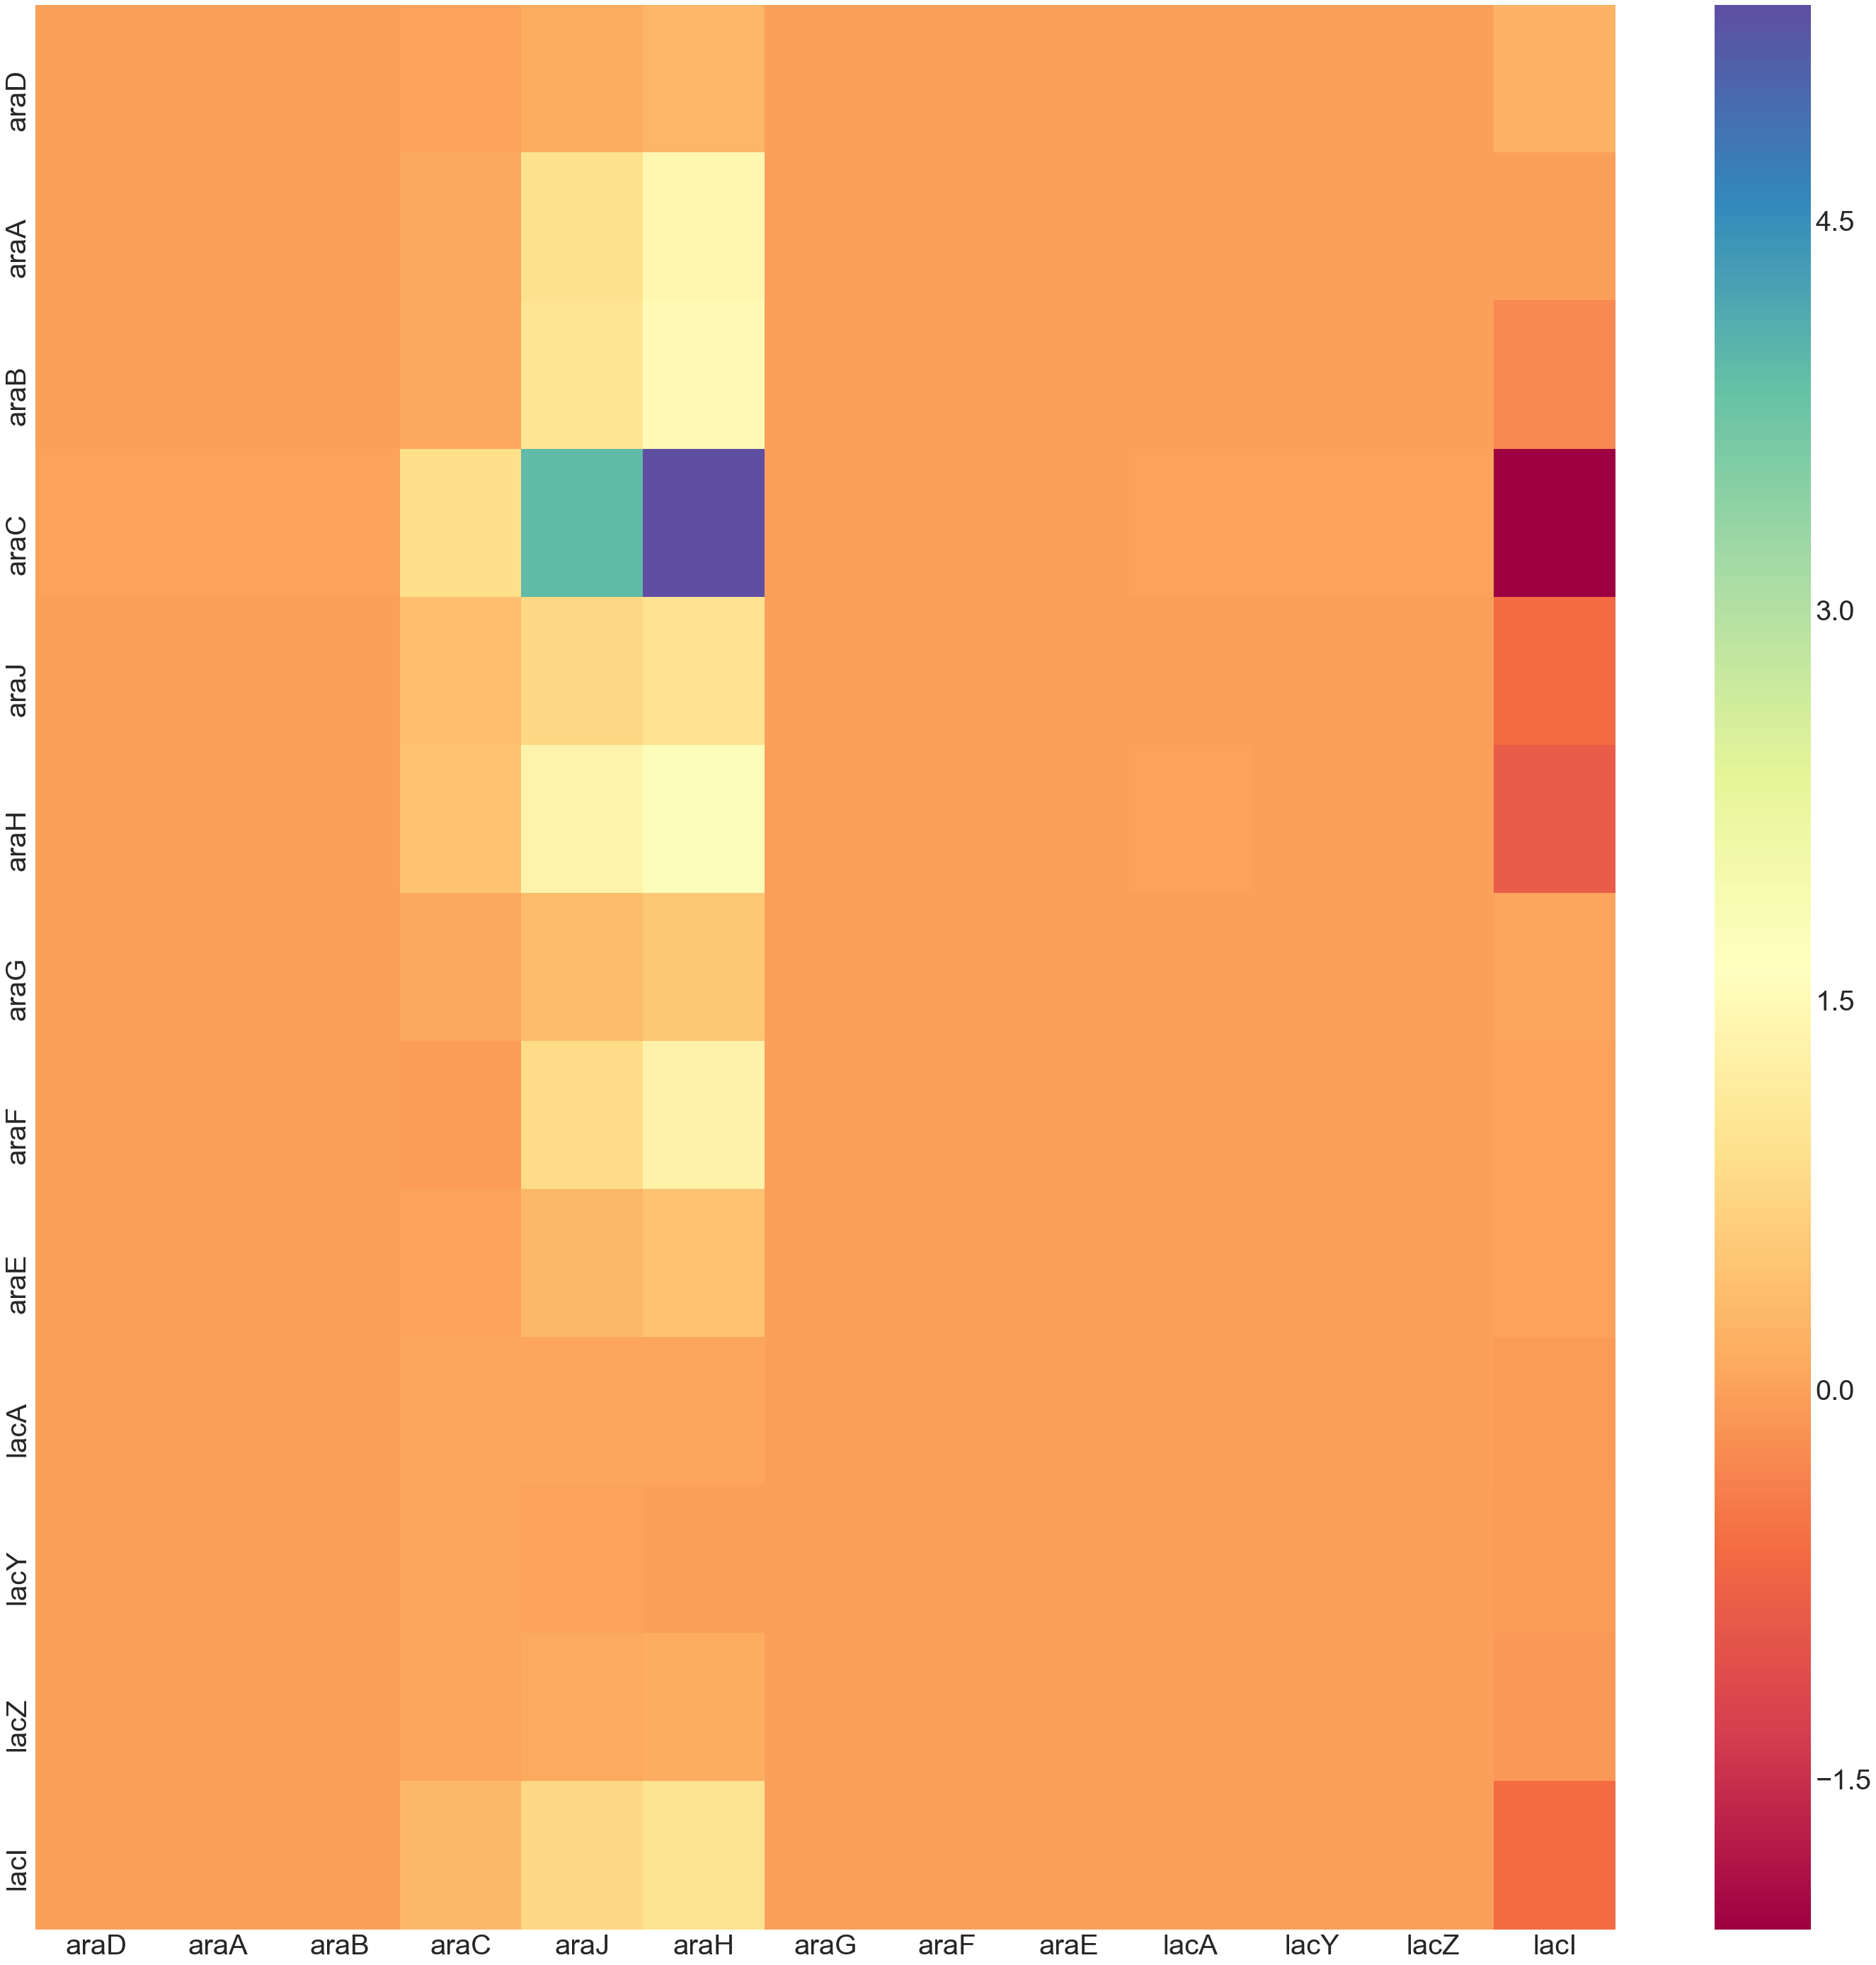

In [658]:
all_genes = list(all_genes)
this_K = calc_Koopman(Yf_data,Yp_data,flag=2,lambda_val=0.0)
import seaborn as sns
plt.figure(figsize=(50,50))
all_gene_labels = [all_genes[elem] for elem in common_indices]
sns.set(font_scale=4.0)
sns.heatmap(this_K,cmap='Spectral',xticklabels=all_gene_labels,yticklabels=all_gene_labels)
#plt.savefig('Current_Koopman_Estimate_LowCV.eps')

## Define Input Lifting and Input-Koopman Dynamics - IPTG Response

In [667]:
StateLinearDictionary = [lambda x:x[elem] for elem in np.arange(0,len(common_indices),1)];
StateLifting = Lifting(np.arange(1,len(common_indices),1),StateLinearDictionary,len(common_indices))
KM = InputKoopmanModel(this_K,StateLifting,None,None)

In [668]:
del(InputLifting)

InputQuadraticDictionary = []
for elem in np.arange(0,len(common_indices),1):
    exec('g= lambda x:x[' + repr(elem) + ']*x[-1]')
    InputQuadraticDictionary.append(g);


InputQuadraticDictionary = InputQuadraticDictionary+[lambda xu:xu[-1]]; 

InputLifting = Lifting(np.arange(0,len(InputQuadraticDictionary)),InputQuadraticDictionary,len(InputQuadraticDictionary))


In [669]:
%autoreload
viz_this_set = False; 
timepair_list = [];
for ind_cond in ['10']:
    for temp in ['37']:
        for replicate_ind in ['0','1','2','3']:
            pair_string = [ind_cond+temp+'5'+replicate_ind,ind_cond+temp+'18'+replicate_ind];
            timepair_list.append(pair_string);
            
this_strain_id = 'MG1655_WT'
#this_strain_id = 'MG1655_NAND_Circuit'
#this_strain_id = 'MG1655_pJS007_LALT__P3__PhlF'
#this_strain_id = 'MG1655_IcaR_Gate'
timepoint_5hr_index = 0; 
timepoint_18hr_index = 1; 
T1_list = [];
T2_list = [];
for pair_tuple in timepair_list:
    x_vec = master_dict[this_strain_id][pair_tuple[timepoint_5hr_index]][0]
    y_vec = master_dict[this_strain_id][pair_tuple[timepoint_18hr_index]][0];
    
    T1_list.append(x_vec);
    T2_list.append(y_vec);
    

T1_list = np.asarray(T1_list,dtype=np.float32)
T2_list = np.asarray(T2_list,dtype=np.float32)

T1_list_raw = T1_list; 
T2_list_raw = T2_list;

#T1_list_log = np.log10(T1_list);
#T1_list_log[T1_list_log==-np.Inf] = 0.0;
#T2_list_log = np.log10(T2_list);
#T2_list_log[T2_list_log==-np.Inf] = 0.0;


T1_list = np.asarray(T1_list,dtype=np.float32)
T2_list = np.asarray(T2_list,dtype=np.float32)

T1_list_raw = T1_list; 
T2_list_raw = T2_list;


import sklearn;
from sklearn.preprocessing import Normalizer
transformer1 = Normalizer().fit(T1_list_raw)
T1_list = transformer1.transform(T1_list_raw)

transformer2 = Normalizer().fit(T2_list_raw)
T2_list =  transformer2.transform(T2_list_raw)

T1_list_log_norm = T1_list;
T2_list_log_norm = T2_list;
#T2_list = T2_list_log;

low_cv_reps = [0,2,3]
col_ind_map = [0,0,1,2]

if viz_this_set:
    mu_t1 = np.mean(T1_list[low_cv_reps][:],axis=0);
    s_t1 = np.std(T1_list[low_cv_reps][:],axis=0);

    mu_t2 = np.mean(T2_list[low_cv_reps][:],axis=0);
    s_t2 = np.std(T2_list[low_cv_reps][:],axis=0);
    cv1 = mu_t1-mu_t1;
    cv2 = mu_t2-mu_t2;
    plt.figure()
    plt.scatter((mu_t1[low_cv_indices]),(mu_t2[low_cv_indices]))
    plt.xlim([0.0,1.0])
    plt.figure()
    plt.scatter(mu_t1,mu_t2)
    plt.xlim([0.0,1.0])


Yp_data = np.zeros((len(common_indices),len(low_cv_reps)))
Yf_data = np.zeros((len(common_indices),len(low_cv_reps)))
Up_data = 1e0*np.ones((1,len(low_cv_reps)));
PsiUp = np.zeros( (InputLifting.return_dim(),Up_data.shape[1]));
for ind in range(0,Up_data.shape[1]):
    xu_vec = np.vstack((Yp_data[:,ind].reshape((len(Yp_data[:,ind]),1)),Up_data[:,ind].reshape(len(Up_data[:,ind]),1)))
    PsiUp[:,ind] = InputLifting.eval_lifting_array(xu_vec).flatten();


for col_ind in low_cv_reps:
    Yp_data[:,col_ind_map[col_ind]] = T1_list_log_norm.T[common_indices,col_ind];
    Yf_data[:,col_ind_map[col_ind]]= T2_list_log_norm.T[common_indices,col_ind];


    
Ki = calc_Input_Koopman(KM.Kol,Yf_data,Yp_data,PsiUp,flag=2,lambda_val=0.1)
KM.K_input = Ki;
KM.Ki = Ki;

KM.Psi_input = InputLifting;
KM.Pi = InputLifting;

13
13
13
13
13
13
13
13
13
13
13
13
13
13
----------------------------------------------------------------------------
	SCS v1.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2016
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 774, CG tol ~ 1/iter^(2.00)
eps = 1.00e-03, alpha = 1.50, max_iters = 10000000, normalize = 1, scale = 1.00
Variables n = 368, constraints m = 410
Cones:	linear vars: 364
	soc vars: 46, soc blks: 4
Setup time: 4.51e-04s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0|      inf       inf       nan      -inf       inf       inf  4.68e-04 
    40| 8.44e-04  8.92e-04  3.19e-04  8.61e-02  8.65e-02  4.73e-17  1.02e-03 
-------------------------------------------------------------------

ERROR: Line magic function `%autoreload` not found.


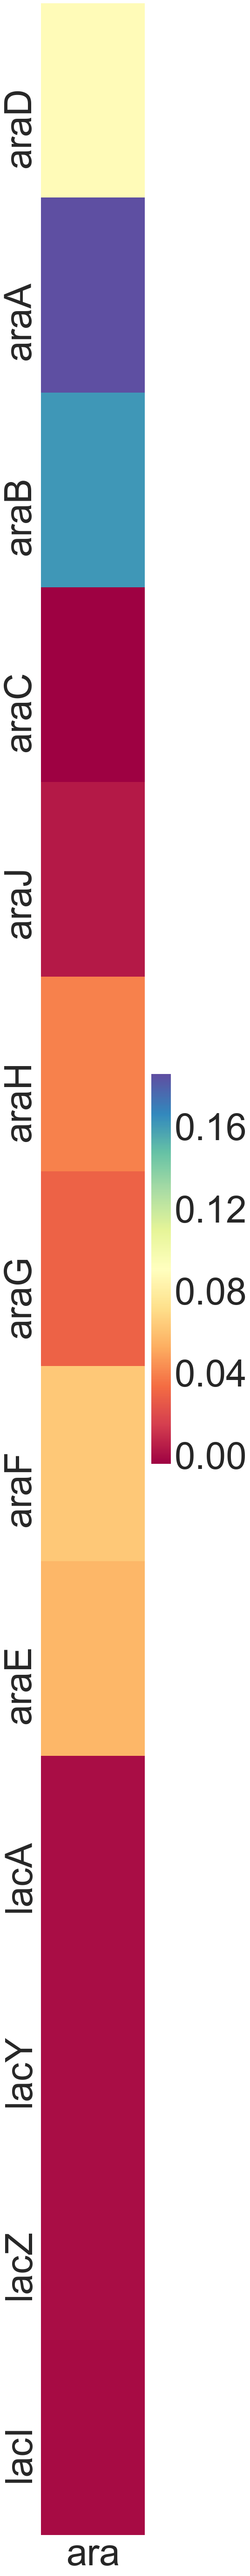

In [670]:
import seaborn as sns
plt.figure(figsize=(5,100))
sns.set(font_scale=8.0)
all_gene_labels = [all_genes[elem] for elem in common_indices]
sns.heatmap(Ki[:,-1],cmap='Spectral',xticklabels=['ara'],yticklabels=all_gene_labels)

In [361]:
4136-4098

38

## Define PhlF Gate Lifting and Input-Dynamics

In [672]:

InputLinearDictionary = [None]*len(all_genes)
for elem in np.arange(0,len(all_genes),1):
    exec('g= lambda x:x[' + repr(elem) + ']')
    InputLinearDictionary[elem] = g;
     

InputLifting = Lifting(np.arange(4098,4136,1),InputLinearDictionary,len(all_genes)-4098)

%autoreload
viz_this_set = False; 
timepair_list = [];
for ind_cond in ['10']:
    for temp in ['37']:
        for replicate_ind in ['0','1','2','3']:
            pair_string = [ind_cond+temp+'5'+replicate_ind,ind_cond+temp+'18'+replicate_ind];
            timepair_list.append(pair_string);
            
#this_strain_id = 'MG1655_WT'
this_strain_id = 'MG1655_NAND_Circuit'
#this_strain_id = 'MG1655_pJS007_LALT__P3__PhlF'
#this_strain_id = 'MG1655_IcaR_Gate'
#this_strain_id = 'MG1655_PhlF_Gate'
timepoint_5hr_index = 0; 
timepoint_18hr_index = 1; 
T1_list = [];
T2_list = [];
for pair_tuple in timepair_list:
    x_vec = master_dict[this_strain_id][pair_tuple[timepoint_5hr_index]][0]
    y_vec = master_dict[this_strain_id][pair_tuple[timepoint_18hr_index]][0];
    
    T1_list.append(x_vec);
    T2_list.append(y_vec);
    

T1_list = np.asarray(T1_list,dtype=np.float32)
T2_list = np.asarray(T2_list,dtype=np.float32)

T1_list_raw = T1_list; 
T2_list_raw = T2_list;


import sklearn;
from sklearn.preprocessing import Normalizer
transformer1 = Normalizer().fit(T1_list_raw)
T1_list = transformer1.transform(T1_list_raw)

transformer2 = Normalizer().fit(T2_list_raw)
T2_list =  transformer2.transform(T2_list_raw)

T1_list_log_norm = T1_list;
T2_list_log_norm = T2_list;

#T1_list_log = np.log10(T1_list);
#T1_list_log[T1_list_log==-np.Inf] = 0.0;
#T2_list_log = np.log10(T2_list);
#T2_list_log[T2_list_log==-np.Inf] = 0.0;

#T1_list = T1_list_log;
#T2_list = T2_list_log;

low_cv_reps = [0,2,3]
col_ind_map = [0,0,1,2]

if viz_this_set:
    mu_t1 = np.mean(T1_list[low_cv_reps][:],axis=0);
    s_t1 = np.std(T1_list[low_cv_reps][:],axis=0);

    mu_t2 = np.mean(T2_list[low_cv_reps][:],axis=0);
    s_t2 = np.std(T2_list[low_cv_reps][:],axis=0);
    cv1 = mu_t1-mu_t1;
    cv2 = mu_t2-mu_t2;
    plt.figure()
    plt.scatter((mu_t1[low_cv_indices]),(mu_t2[low_cv_indices]))
    plt.ylim([0.0,1.0])
    plt.xlim([0.0,1.0])
    plt.figure()
    plt.scatter(mu_t1,mu_t2)
    plt.ylim([0.0,1.0])
    plt.xlim([0.0,1.0])


Yp_data = np.zeros((len(common_indices),len(low_cv_reps)))
Yf_data = np.zeros((len(common_indices),len(low_cv_reps)))
Up_data = 1e0*np.ones((1,len(low_cv_reps)));
PsiUp_Gate = np.zeros( (InputLifting.return_dim(),len(low_cv_reps)));
for ind in range(0,len(low_cv_reps)):
    PsiUp_Gate[:,ind] = InputLifting.eval_lifting_array(T1_list.T[:,ind]).flatten();


for col_ind in low_cv_reps:
    Yp_data[:,col_ind_map[col_ind]] = T1_list_log_norm.T[common_indices,col_ind];
    Yf_data[:,col_ind_map[col_ind]]= T2_list_log_norm.T[common_indices,col_ind];


    
Ki = calc_Append_Input_Koopman(KM.Kol,KM.Ki,Yf_data,Yp_data,PsiUp,PsiUp_Gate,flag=2,lambda_val=0.1)

#calc_Input_Koopman_Koopman(KM.Kol,Yf_data,Yp_data,PsiUp,flag=2,lambda_val=0.1)
KM.append_input(Ki,InputLifting)

----------------------------------------------------------------------------
	SCS v1.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2016
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 2685, CG tol ~ 1/iter^(2.00)
eps = 1.00e-03, alpha = 1.50, max_iters = 10000000, normalize = 1, scale = 1.00
Variables n = 992, constraints m = 1034
Cones:	linear vars: 988
	soc vars: 46, soc blks: 4
Setup time: 1.16e-03s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0|      inf       inf       nan      -inf       inf       inf  6.29e-04 
   100| 4.60e-04  1.20e-03  7.13e-05  1.57e-01  1.57e-01  7.80e-17  6.65e-03 
   120| 3.13e-04  8.61e-04  1.19e-04  1.57e-01  1.57e-01  7.81e-17  7.90e-03 
-----------------------------

ERROR: Line magic function `%autoreload` not found.


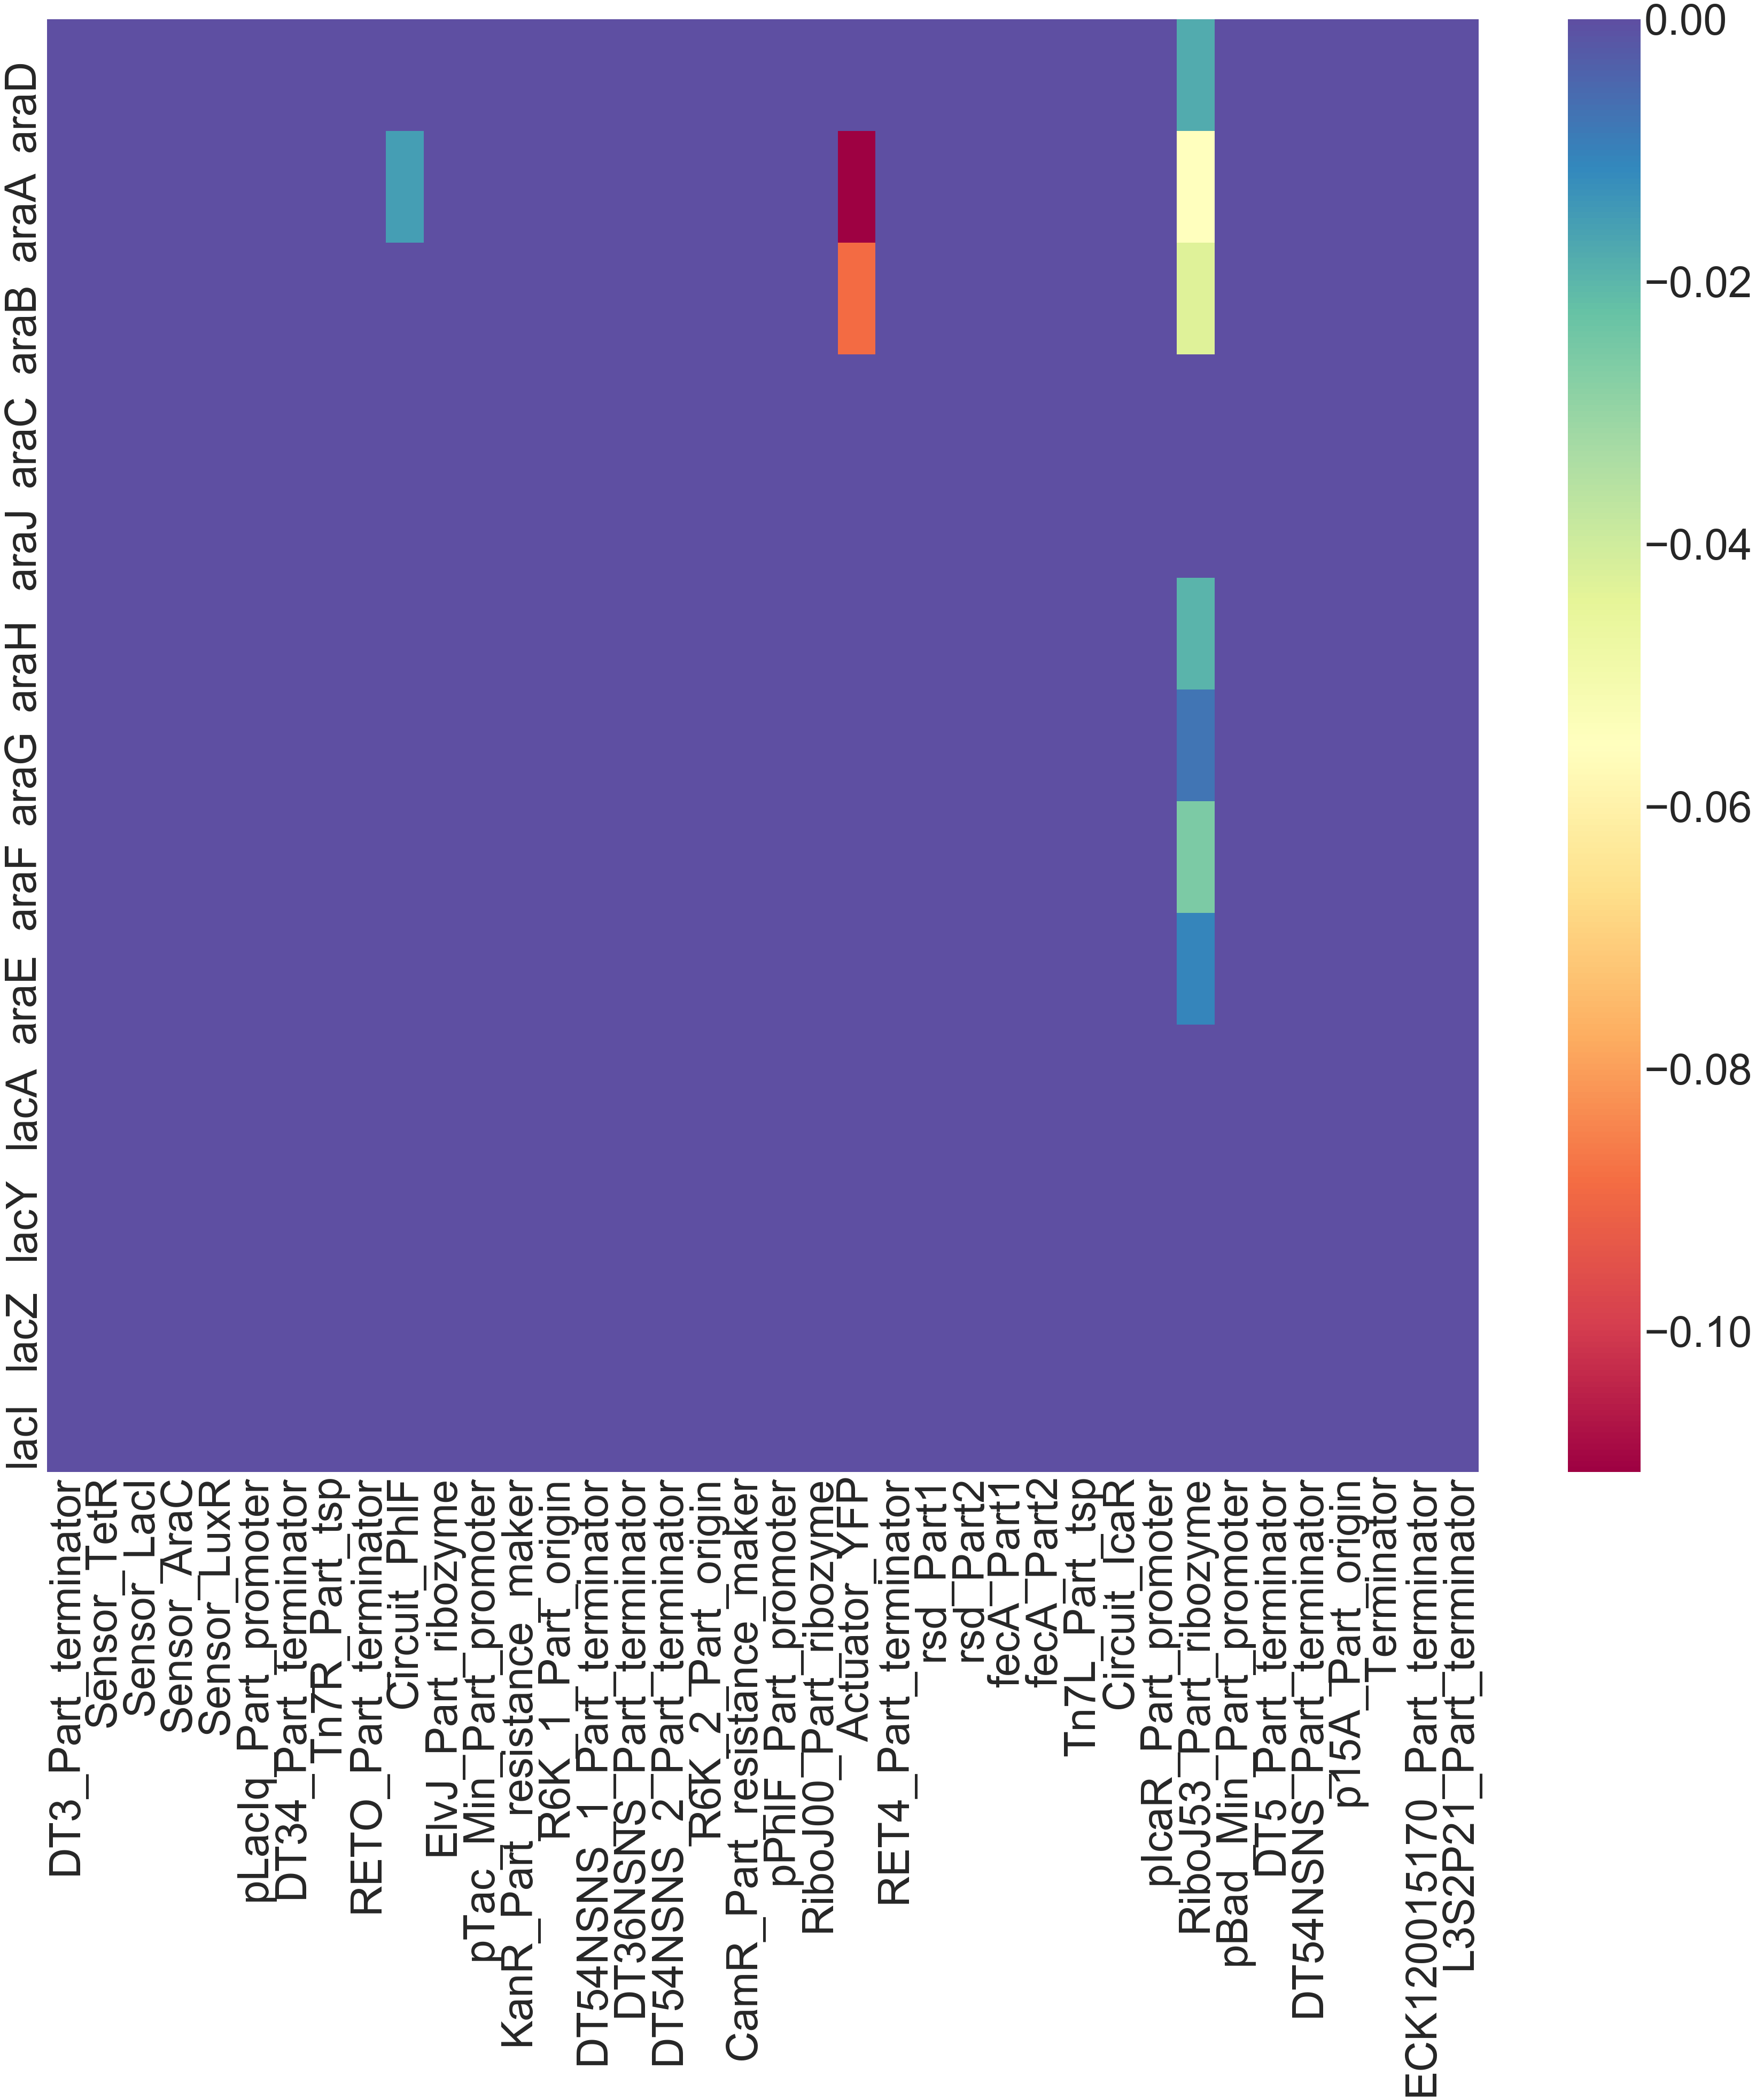

In [675]:
import seaborn as sns
plt.figure(figsize=(60,50))
all_gene_labels = [all_genes[elem] for elem in common_indices]

sns.heatmap(Ki,cmap='Spectral',xticklabels=Circuit_Gene_Names,yticklabels=all_gene_labels)

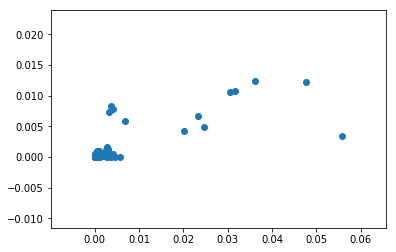

In [300]:
plt.scatter(T1_list.T[4098:4136,:],T2_list.T[4098:4136,:])

In [308]:
np.linalg.norm(KM,ord=2)

6.2829456

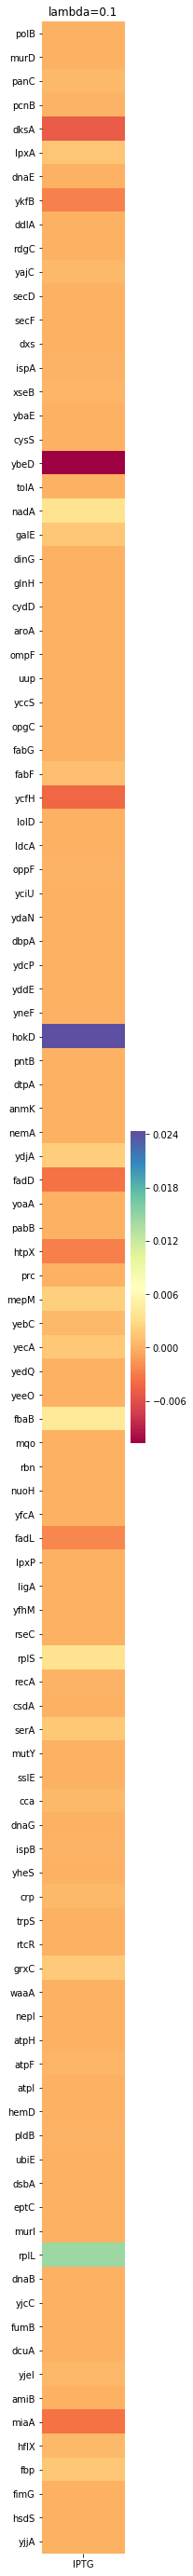

In [317]:
    plt.figure(figsize=(2,50))
    plt.title('lambda='+repr(0.1)); 
    sns.heatmap(Ki[:,-1],cmap='Spectral',yticklabels=all_gene_labels,xticklabels=['IPTG'])
    plt.show()

In [182]:
#all_genes[common_indices[153]]
#all_genes[common_indices[254]]
#all_genes[common_indices[125]]
#all_genes[common_indices[244]] #lpp 
temp_indices = range(0,this_K.shape[0],1);
#temp_indices.remove(244); 
#temp_indices.remove(125);
#temp_indices.remove(254)
#temp_indices.remove(153)
plt.figure(figsize=(50,50))
plt.title('lambda='+repr(lambda_val_real)); 
sns.heatmap(this_K[temp_indices,temp_indices],cmap='Spectral')#,xticklabels=all_gene_labels,yticklabels=all_gene_labels)
plt.show()

NameError: name 'lambda_val_real' is not defined

<Figure size 5000x5000 with 0 Axes>

In [ ]:
import scipy.sparse as sp
import scipy.sparse.linalg as spl
sparse_K = sp.coo_matrix(this_K)
d,v = spl.eigs(sparse_K,k=10)

list_all_genes = list(all_genes);
for row_ind in range(0,this_K.shape[0]):
    for col_ind in range(0,this_K.shape[1]):
        if (np.abs(this_K[row_ind][col_ind]) >5e-1) and (row_ind != col_ind):
            #if common_indices[col_ind] in circuit_ids or common_indices[row_ind] in circuit_ids:
                print(list_all_genes[common_indices[row_ind]] + " is affected by " +list_all_genes[common_indices[col_ind]])


circuit_to_host_K = this_K[:,circuit_coords_in_K]
#print(circuit_to_host_K[circuit_to_host_K>5e-11])

import seaborn as sns


host_to_circuit_K = this_K[circuit_coords_in_K,:]
#print(host_to_circuit_K[host_to_circuit_K>5e-11])
